### MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### IMPORT

In [ ]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

In [ ]:
import nltk
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
pass

In [ ]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import matplotlib.pyplot as plt

### CONSTANTS

In [ ]:
PROJECT_DIR = "/content/drive/MyDrive/SNAMA"

DATA_PATH = os.path.join(PROJECT_DIR, "data")
CHECKPOINTS_PATH = os.path.join(PROJECT_DIR, "checkpoints")
MODELS_PATH = os.path.join(PROJECT_DIR, "models")

DATASET_NAME = "amazon_reviews.csv"
DATASET_PATH = os.path.join(DATA_PATH, DATASET_NAME)

PREPROCESSED_DATASET_NAME = "amazon_reviews_preprocessed.pckl"
PREPROCESSED_LABELS_NAME = "amazon_reviews_preprocessed_labels.pckl"

In [ ]:
__LOGICAL_CORES__ = 0x4

### IO

In [ ]:
def dump_object(data, file, directory):
    with open(os.path.join(directory, file), 'wb') as file:
        pickle.dump(data, file)


def load_object(file, directory):
    with open(os.path.join(directory, file), 'rb') as file:
        data = pickle.load(file)
        return data


def exists_object(file, directory):
    return os.path.isfile(os.path.join(directory, file))


def dump_model(data, file, directory=MODELS_PATH):
    dump_object(data, file, directory)


def load_model(file, directory=MODELS_PATH):
    return load_object(file, directory)


def exists_model(file, directory=MODELS_PATH):
    return exists_object(file, directory)


def dump_checkpoint(data, file, directory=CHECKPOINTS_PATH):
    dump_object(data, file, directory)


def load_checkpoint(file, directory=CHECKPOINTS_PATH):
    return load_object(file, directory)


def exists_checkpoint(file, directory=CHECKPOINTS_PATH):
    return exists_object(file, directory)


def load_dataset_from_csv(file, directory=DATA_PATH):
    dataframe_ = pd.read_csv(os.path.join(directory, file))
    return dataframe_.Text.values, dataframe_.Score.values


def dump_dataset(data, file, directory=DATA_PATH):
    dump_object(data, file, directory)


def load_dataset(file, directory=DATA_PATH):
    return load_object(file, directory)


def exists_checkpoint(file, directory=DATA_PATH):
    return exists_object(file, directory)

### PREPROCESSING FUNCTIONS

In [ ]:
def get_wordnet_pos(tag):
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag[0x0], wordnet.NOUN)

In [ ]:
def get_corpus(dataset):
    corpus = set()

    for text in dataset:
        tokens = nltk.word_tokenize(text)
        corpus = corpus.union(tokens)

    return corpus

In [ ]:
def preprocess_dataset(dataset):
    word_net_lemmatizer = WordNetLemmatizer()

    en_stopwords = set(stopwords.words("english"))

    for i in range(dataset.shape[0x0]):
        dataset[i] = re.sub(r'\W+', " ", re.sub(r"<.*?>", " ", dataset[i]))\
                        .strip()\
                        .lower()

        tagged_words = pos_tag(nltk.word_tokenize(dataset[i]))

        processed_words = []

        for j, (word, tag) in enumerate(tagged_words):

            if len(word) > 0x1 and word not in en_stopwords and word.isalpha():
                processed_words.append(word_net_lemmatizer.lemmatize(word, get_wordnet_pos(tag)))

        dataset[i] = " ".join(processed_words)

### CORPUSES INSPECTION

In [ ]:
dataset = load_dataset(PREPROCESSED_DATASET_NAME)
labels = load_dataset(PREPROCESSED_LABELS_NAME)

In [ ]:
corpuses = []
for label in range(0x3):
    ds = dataset[np.argwhere(labels == label)]
    ds = ds.reshape(-0x1)
    corpus = get_corpus(ds)
    corpuses.append(corpus)

In [ ]:
int_0_1 = corpuses[0].intersection(corpuses[1])
int_1_2 = corpuses[1].intersection(corpuses[2])

In [ ]:
print(f"Intersection classes 0 /\ 1 = {len(int_0_1)}")
print(f"Intersection classes 1 /\ 2 = {len(int_1_2)}")

Intersection classes 0 /\ 1 = 18443
Intersection classes 1 /\ 2 = 18901


In [ ]:
data = [len(corpuses[i]) for i in range(0x3)]

In [ ]:
labels = [str(i) for i in range(0x3)]

In [ ]:
for i in range(0x3):
    print(f"class {i} corpus size: {data[i]}")

class 0 corpus size: 36246
class 1 corpus size: 26853
class 2 corpus size: 39228


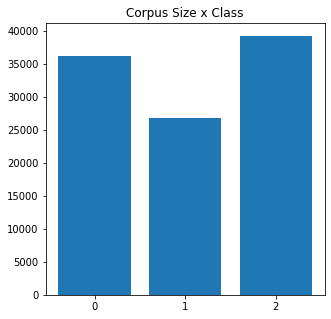

In [ ]:
plt.figure(figsize=(0x5, 0x5))
plt.bar(x=labels, height=data)
plt.title("Corpus Size x Class")
plt.show()

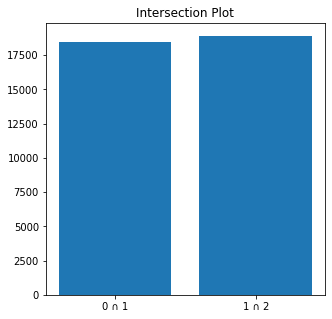

In [ ]:
plt.figure(figsize=(0x5, 0x5))
plt.bar(x=["0 ∩ 1", "1 ∩ 2"], height=[len(int_0_1), len(int_1_2)])
plt.title("Intersection Plot")
plt.show()